## For Nutrient and d15N data from cruises
Data analysis and plotting

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import cartopy
import cartopy.feature as cfeature
import cmocean.cm as cmo
from matplotlib.ticker import LogFormatter 
import matplotlib.ticker as mticker

#### Helpful HTML links

In [1]:
# https://stackoverflow.com/questions/21285885/remove-line-through-marker-in-matplotlib-legend# 
# https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python
# https://stackoverflow.com/questions/33997361/how-to-convert-degree-minute-second-to-degree-decimal
# https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html
# https://www.science-emergence.com/Codes/Plot-MODIS-L3-chlorophyll-concentration-with-python/

In [121]:
df = pd.read_csv('~/Documents/GitHub/data/cruise_nutrients.txt',
#                  sep=',',     # field separator
                 comment='#', # comment
                 delimiter = '\t'
#                  index_col=0, # number or label of index column
                 ).sort_values('depth')

In [122]:
df

,depth,sample id,phosphate,silicate,total n,ammonia,site,lat,lon,cruise,date
79,0.0,AT41-CTD011-N24,0.037546,0.933476,0.092426,0.03238784,Stetson Banks II,32.072700,-78.309400,Atlantis,8/27/18
43,2.7,AT41-CTD05-N24,0.033774,0.700125,0.275740,0.601308197,Stetson Deep,32.036517,-77.354583,Atlantis,8/23/18
55,3.0,AT41-CTD08-N24,0.026183,0.744192,0.176524,0.374713492,Blake Escarpment,31.324900,-77.240300,Atlantis,8/25/18
...,...,...,...,...,...,...,...,...,...,...,...
44,1280.0,AT41-CTD08-N3,1.144186,11.318771,18.270969,0.053539083,Blake Escarpment,31.324900,-77.240300,Atlantis,8/25/18
93,1940.0,BCMM-05OCT18-09-CTD06-N4,0.919276,9.076730,10.959837,0.205360222,Pamlico Canyon,34.923123,-75.151212,Brooks McCall,NaN
80,2267.0,AT41-CTD013-N3,0.732601,10.402726,9.050889,0.264751066,Blake Ridge,32.490620,-76.192600,Atlantis,8/28/18


In [123]:
depth = df['depth']
po4 = df['phosphate']
sil = df['silicate']
total_n = df['total n']
nh4 = df['ammonia']

In [125]:
atlantis = df[df.cruise == 'Atlantis']
endeavor = df[df.cruise == 'Endeavor']
brooks = df[df.cruise == 'Brooks McCall']

In [126]:
# df['site'].values # So I know what the different sites are, note to not use () here
df['site'].unique() # Alternatively

array(['Stetson Banks II', 'Stetson Deep', 'Blake Escarpment',
       'Stetson Banks', 'Richardson Hills', 'VAC (Virginia Inter-Canyon)',
       'WIL', 'SAV (Savannah deep)', 'CHB (Stetson)', 'Pamlico Canyon',
       'JAX (Jacksonville)', 'BLE (30N deep)', 'Richardson Bend',
       'Blake Ridge', 'Pea Island Seep'], dtype=object)

In [18]:
lats = df['lat'].unique()
lons = df['lon'].unique()

coord = np.column_stack((lats, lons))

In [118]:
endeavor = endeavor.sort_values('lat')

endeavor_lats = endeavor['lat']
endeavor_lons = endeavor['lon']

coord = np.column_stack((endeavor_lats, endeavor_lons))

endeavor_lats

0     29 14.972
1     29 14.972
2     29 14.972
        ...    
28    37 14.423
26    37 14.423
29    37 14.423
Name: lat, Length: 30, dtype: object

In [120]:
import re as re
split = re.split(' ', '29 14.972')
split

['29', '14.972']

In [7]:
new_df = df[df.site == 'Stetson Banks']

In [127]:
brooks

,depth,sample id,phosphate,silicate,total n,ammonia,site,lat,lon,cruise,date
88,5.0,BCMM-03OCT18-06-CTD04-N7,0.022313,0.862772,1.030723,0.25210527,Richardson Hills,31.985552,-77.418493,Brooks McCall,NaN
94,5.0,BCMM-05OCT18-09-CTD06-N10,0.022075,1.085840,0.054172,0.035297282,Pamlico Canyon,34.923123,-75.151212,Brooks McCall,NaN
82,7.0,BCMM-02OCT18-02-CTD02-N8,0.025493,0.841184,0.341159,0.635351073,Richardson Bend,31.806705,-77.593605,Brooks McCall,NaN
...,...,...,...,...,...,...,...,...,...,...,...
89,700.0,BCMM-04OCT18-07-CTD05-N3,1.353611,11.294823,21.119410,0.00737745,Richardson Hills,31.985337,-77.418173,Brooks McCall,NaN
87,863.0,BCMM-03OCT18-06-CTD04-N1,1.145392,9.898846,14.758059,0.093044907,Richardson Hills,31.985552,-77.418493,Brooks McCall,NaN
93,1940.0,BCMM-05OCT18-09-CTD06-N4,0.919276,9.076730,10.959837,0.205360222,Pamlico Canyon,34.923123,-75.151212,Brooks McCall,NaN


### Plotting CTD data

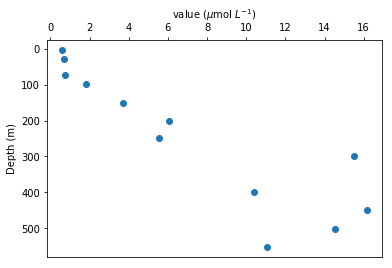

In [9]:
n = new_df['total n']
p = new_df['phosphate']
s = new_df['silicate']
depth = new_df['depth']

fig1 = plt.figure()

ax1 = fig1.add_subplot(111)
ax1.plot(s,depth,'o')
 
# Draw x label
ax1.set_xlabel('value (' r'$\mu$mol $L^{-1}$)')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax1.xaxis.tick_top() # ANOTHER way to move the ticks to the top
 
# Draw y label
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
 
plt.show()

In [128]:
# Filter out the data
# Likely an easier way to do this, will figure that out later 08/26/2019

stet_banks = df[df.site == 'Stetson Banks']
stet_banks2 = df[df.site == 'Stetson Banks II']
stet_deep = df[df.site == 'Stetson Deep']
jax = df[df.site == 'JAX (Jacksonville)']
sav = df[df.site == 'SAV (Savannah deep)']
ble = df[df.site == 'BLE (30N deep)']
chb = df[df.site == 'CHB (Stetson)']
bend = df[df.site == 'Richardson Bend']
hills = df[df.site == 'Richardson Hills']
blake = df[df.site == 'Blake Escarpment']

In [129]:
hills

,depth,sample id,phosphate,silicate,total n,ammonia,site,lat,lon,cruise,date
88,5.0,BCMM-03OCT18-06-CTD04-N7,0.022313,0.862772,1.030723,0.25210527,Richardson Hills,31.985552,-77.418493,Brooks McCall,NaN
92,125.0,BCMM-04OCT18-07-CTD05-N10,0.053218,0.806285,2.128936,0.033707314,Richardson Hills,31.985337,-77.418173,Brooks McCall,NaN
91,300.0,BCMM-04OCT18-07-CTD05-N9,0.100596,0.932211,2.178850,0.066206253,Richardson Hills,31.985337,-77.418173,Brooks McCall,NaN
90,500.0,BCMM-04OCT18-07-CTD05-N6,0.590427,3.368695,10.094892,6.36E-05,Richardson Hills,31.985337,-77.418173,Brooks McCall,NaN
89,700.0,BCMM-04OCT18-07-CTD05-N3,1.353611,11.294823,21.119410,0.00737745,Richardson Hills,31.985337,-77.418173,Brooks McCall,NaN
87,863.0,BCMM-03OCT18-06-CTD04-N1,1.145392,9.898846,14.758059,0.093044907,Richardson Hills,31.985552,-77.418493,Brooks McCall,NaN


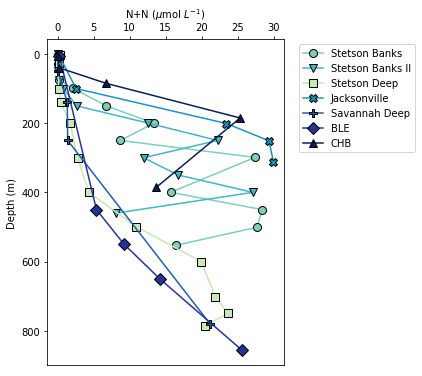

In [64]:
# Trying out plotting multiple series on the same plot
fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

plt.plot('total n', 'depth', data=stet_banks, marker='o', color='#7fcdbb', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8)
plt.plot('total n', 'depth', data=stet_banks2, marker='v', color='#41b6c4', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8)
plt.plot('total n', 'depth', data=stet_deep, marker='s', color='#c7e9b4', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8)
plt.plot('total n', 'depth', data=jax, marker='X', color='#1d91c0', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8)
plt.plot('total n', 'depth', data=sav, marker='P', color='#225ea8', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8)
plt.plot('total n', 'depth', data=ble, marker='D', color='#253494', label = 'BLE', markeredgecolor = 'black', markersize = 8)
plt.plot('total n', 'depth', data=chb, marker='^', color='#081d58', label = 'CHB', markeredgecolor = 'black', markersize = 8)

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('N+N (' r'$\mu$mol $L^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('ctd-n.pdf', bbox_inches='tight')

plt.show()

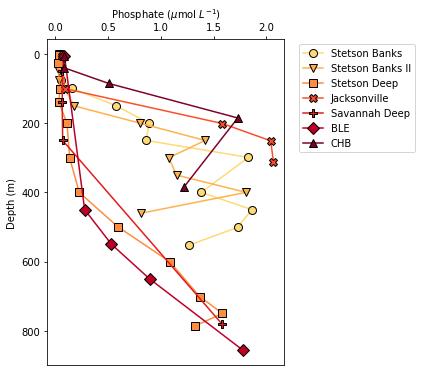

In [65]:
# Phosphate
fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

plt.plot('phosphate', 'depth', data=stet_banks, marker='o', color='#fed976', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=stet_banks2, marker='v', color='#feb24c', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=stet_deep, marker='s', color='#fd8d3c', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=jax, marker='X', color='#fc4e2a', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=sav, marker='P', color='#e31a1c', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=ble, marker='D', color='#bd0026', label = 'BLE', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=chb, marker='^', color='#800026', label = 'CHB', markeredgecolor = 'black', markersize = 8)

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('Phosphate (' r'$\mu$mol $L^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('ctd-phosphate.pdf', bbox_inches='tight')

plt.show()

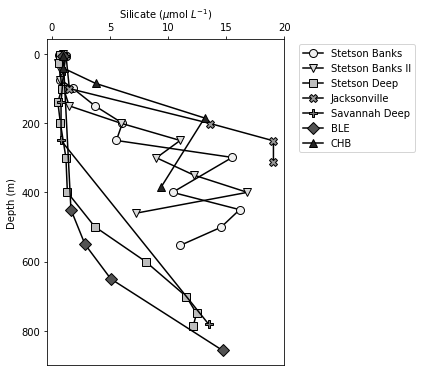

In [66]:
# Silicate

fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

plt.plot('silicate', 'depth', data=stet_banks, marker='o', markerfacecolor='#f0f0f0', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=stet_deep, marker='s', markerfacecolor='#bdbdbd', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=jax, marker='X', markerfacecolor='#969696', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=sav, marker='P', markerfacecolor='#737373', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=ble, marker='D', markerfacecolor='#525252', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=chb, marker='^', markerfacecolor='#252525', label = 'CHB', markeredgecolor = 'black', markersize = 8, color = 'black')

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('Silicate (' r'$\mu$mol $L^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('ctd-silicate.pdf', bbox_inches='tight')

plt.show()

In [ ]:
# Some code from matplotlib to try out
# import matplotlib.pyplot as pyplot

# Fig, ax = pyplot.subplots()
# for i, (mark, color) in enumerate(zip(
#     ['s', 'o', 'D', 'v'], ['r', 'g', 'b', 'purple'])):
#     ax.plot(i+1, i+1, color=color,
#             marker=mark,
#             markerfacecolor='None',
#             markeredgecolor=color,
#             label=i)

# ax.set_xlim(0,5)
# ax.set_ylim(0,5)
# ax.legend()

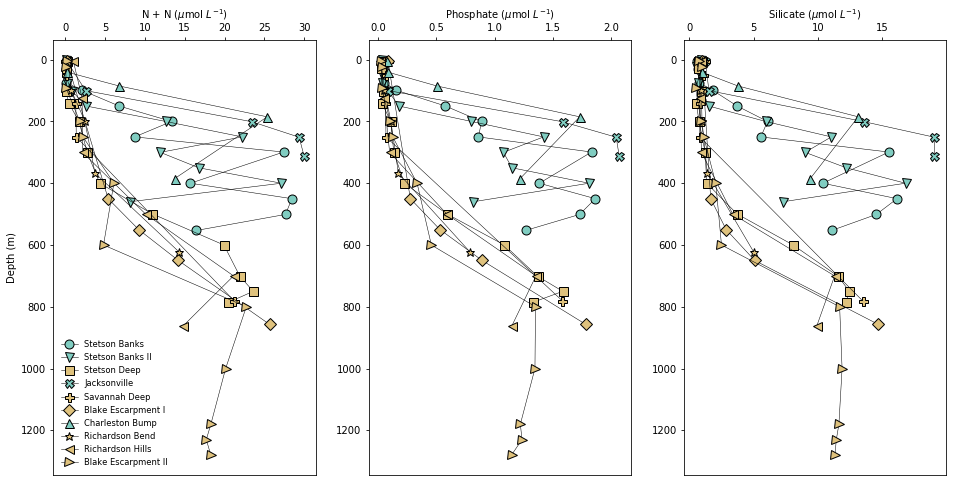

In [87]:
# All three together

figs, axs = plt.subplots(1,3, figsize = (16, 8)) # one row, three columns
# figs.suptitle ('Nutrient Depth Profiles')

col1 = '#80cdc1'
col2 = '#dfc27d'
msize = 9
width = 0.5

# Nitrogen
axs[0].plot('total n', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=sav, marker='P', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=chb, marker='^', markerfacecolor=col1, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=bend, marker='*', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=hills, marker='<', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)


axs[0].xaxis.set_label_position('top') # this moves the label to the top
axs[0].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[0].set_xlabel('N + N (' r'$\mu$mol $L^{-1}$)')

axs[0].set_ylim(axs[0].get_ylim()[::-1])
axs[0].set_ylabel('Depth (m)')

# Phosphate
axs[1].plot('phosphate', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=sav, marker='P', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'BLE', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=chb, marker='^', markerfacecolor=col1, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=bend, marker='*', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=hills, marker='<', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Draw x label
axs[1].xaxis.set_label_position('top') # this moves the label to the top
axs[1].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[1].set_xlabel('Phosphate (' r'$\mu$mol $L^{-1}$)')

# # Draw y label
axs[1].set_ylim(axs[1].get_ylim()[::-1])
# axs[1].set_ylabel('Depth (m)')

# Silicate
axs[2].plot('silicate', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=sav, marker='P', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'BLE', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=chb, marker='^', markerfacecolor=col1, label = 'CHB (Stetson)', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=bend, marker='*', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=hills, marker='<', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

axs[2].xaxis.set_label_position('top') # this moves the label to the top
axs[2].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[2].set_xlabel('Silicate (' r'$\mu$mol $L^{-1}$)')

axs[2].set_ylim(axs[2].get_ylim()[::-1])
# axs[2].set_ylabel('Depth (m)')

# Legend
# axs[0].legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)
axs[0].legend(loc = 'best', frameon = False, fontsize = 'small')

# figs.show()
figs.savefig('ctd-nutrients.pdf', bbox_inches='tight')

In [44]:
# fig, ax = plt.subplots()
# ax.plot('total n', 'phosphate', data = df)

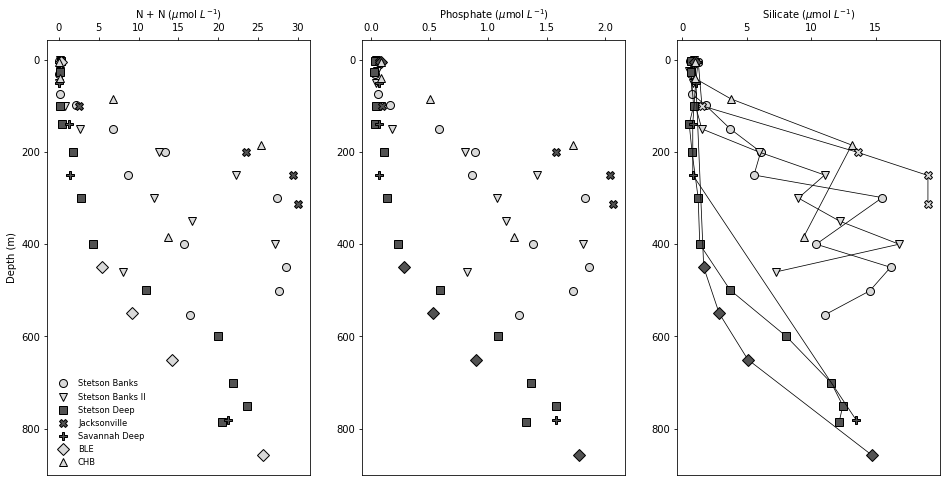

In [52]:
# Changing the color schemes a bit

figs, axs = plt.subplots(1,3, figsize = (16, 8)) # one row, three columns
# figs.suptitle ('Nutrient Depth Profiles')

# Nitrogen
axs[0].plot('total n', 'depth', data=stet_banks, marker='o', markerfacecolor='#d9d9d9', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[0].plot('total n', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[0].plot('total n', 'depth', data=stet_deep, marker='s', markerfacecolor='#525252', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[0].plot('total n', 'depth', data=jax, marker='X', markerfacecolor='#525252', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[0].plot('total n', 'depth', data=sav, marker='P', markerfacecolor='#525252', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[0].plot('total n', 'depth', data=ble, marker='D', markerfacecolor='#d9d9d9', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[0].plot('total n', 'depth', data=chb, marker='^', markerfacecolor='#d9d9d9', label = 'CHB', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')

axs[0].xaxis.set_label_position('top') # this moves the label to the top
axs[0].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[0].set_xlabel('N + N (' r'$\mu$mol $L^{-1}$)')

axs[0].set_ylim(axs[0].get_ylim()[::-1])
axs[0].set_ylabel('Depth (m)')

# Phosphate
axs[1].plot('phosphate', 'depth', data=stet_banks, marker='o', markerfacecolor='#d9d9d9', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[1].plot('phosphate', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[1].plot('phosphate', 'depth', data=stet_deep, marker='s', markerfacecolor='#525252', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[1].plot('phosphate', 'depth', data=jax, marker='X', markerfacecolor='#525252', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[1].plot('phosphate', 'depth', data=sav, marker='P', markerfacecolor='#525252', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[1].plot('phosphate', 'depth', data=ble, marker='D', markerfacecolor='#525252', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[1].plot('phosphate', 'depth', data=chb, marker='^', markerfacecolor='#d9d9d9', label = 'CHB', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')

# Draw x label
axs[1].xaxis.set_label_position('top') # this moves the label to the top
axs[1].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[1].set_xlabel('Phosphate (' r'$\mu$mol $L^{-1}$)')

# # Draw y label
axs[1].set_ylim(axs[1].get_ylim()[::-1])
# axs[1].set_ylabel('Depth (m)')

# Silicate
axs[2].plot('silicate', 'depth', data=stet_banks, marker='o', markerfacecolor='#d9d9d9', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=stet_deep, marker='s', markerfacecolor='#525252', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=jax, marker='X', markerfacecolor='#d9d9d9', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=sav, marker='P', markerfacecolor='#525252', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=ble, marker='D', markerfacecolor='#525252', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=chb, marker='^', markerfacecolor='#d9d9d9', label = 'CHB (Stetson)', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)

axs[2].xaxis.set_label_position('top') # this moves the label to the top
axs[2].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[2].set_xlabel('Silicate (' r'$\mu$mol $L^{-1}$)')

axs[2].set_ylim(axs[2].get_ylim()[::-1])
# axs[2].set_ylabel('Depth (m)')

# Legend
# axs[0].legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)
axs[0].legend(loc = 'best', frameon = False, fontsize = 'small')

# figs.show()
figs.savefig('ctd-nutrients.pdf', bbox_inches='tight')

# Plotting d15N data
d15N vs depth

In [145]:
no3 = pd.read_csv('~/Documents/GitHub/data/nutrients_d15n.csv', delimiter = ',')

In [96]:
print(no3)

   sample                         id                site   d15N  depth  lat  \
0       7                         6a  JAX (Jacksonville)   5.78    312  NaN   
1       9                         8a  JAX (Jacksonville)   5.39    201  NaN   
2   9 rep                         8a  JAX (Jacksonville)   5.66    201  NaN   
..    ...                        ...                 ...    ...    ...  ...   
55     22  BCMM-02OCT18-02-CTD02 N1A     Richardson Bend   4.83    623  NaN   
56     26   BCMM-04OCT18-07-CTD05 N9    Richardson Hills   4.22    300  NaN   
57     27  BCMM-04OCT18-07-CTD05 N10    Richardson Hills  12.87    125  NaN   

    long  
0    NaN  
1    NaN  
2    NaN  
..   ...  
55   NaN  
56   NaN  
57   NaN  

[58 rows x 7 columns]


In [97]:
no3['site'].unique()

array(['JAX (Jacksonville)', 'CHB  (Stetson)', 'SAV (Savannah deep)',
       'Stetson Deep', 'Stetson Banks', 'Stetson Banks II', 'Blake Ridge',
       'Blake Escarpment', 'VAC (Virginia Inter-Canyon)',
       'Pea Island Seep', 'WIL', 'Richardson Bend', 'Richardson Hills'],
      dtype=object)

In [156]:
stet_banks = no3[no3.site == 'Stetson Banks']
stet_banks2 = no3[no3.site == 'Stetson Banks II']
stet_deep = no3[no3.site == 'Stetson Deep']
jax = no3[no3.site == 'JAX (Jacksonville)']
sav = no3[no3.site == 'SAV (Savannah deep)']
chb = no3[no3.site == 'CHB  (Stetson)']
ridge = no3[no3.site == 'Blake Ridge']
blake = no3[no3.site == 'Blake Escarpment']
bend = no3[no3.site == 'Richardson Bend']

hills = no3[no3.site == 'Richardson Hills']
hills = hills[hills['d15N'] < 10]

vac = no3[no3.site == 'VAC (Virginia Inter-Canyon)']

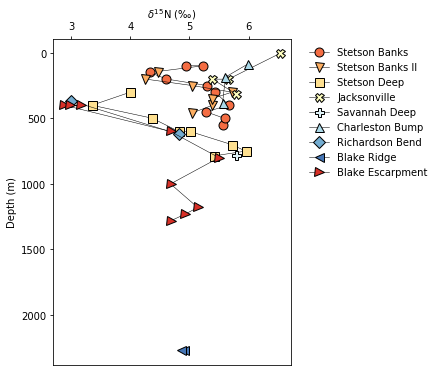

In [153]:
fig = plt.figure(figsize = (4.25,6))
ax = fig.add_subplot(111)

# x = 'd15N'
# y = 'depth'

x,y = 'd15N','depth'

width = 0.5
size = 9

col1 = '#f46d43'
col2 = '#fdae61'
col3 = '#fee090'
col4 = '#ffffbf'
col5 = '#e0f3f8'
col6 = '#abd9e9'
col7 = '#74add1'
col8 = '#4575b4'
col9 = '#d73027'

plt.plot(x, y, data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=stet_banks2, marker='v', markerfacecolor=col2, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=stet_deep, marker='s', markerfacecolor=col3, label = 'Stetson Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=jax, marker='X', markerfacecolor=col4, label = 'Jacksonville', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=sav, marker='P', markerfacecolor=col5, label = 'Savannah Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=chb, marker='^', markerfacecolor=col6, label = 'Charleston Bump', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=bend, marker='D', markerfacecolor=col7, label = 'Richardson Bend', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=ridge, marker='<', markerfacecolor=col8, label = 'Blake Ridge', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=blake, marker='>', markerfacecolor=col9, label = 'Blake Escarpment', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)


# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel(r'$\delta^{15}$N ('u"\u2030)")

# Draw y label
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="best", frameon = False)

plt.savefig('ctd-d15N.pdf', bbox_inches='tight')

plt.show()

In [ ]:
fig = plt.figure(figsize = (4.25,6))
ax = fig.add_subplot(111)

x = 'd15N'
y = 'depth'

plt.plot(x, y, data=stet_banks, marker='o', markerfacecolor='#fed976', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 1)
plt.plot(x, y, data=stet_banks2, marker='v', markerfacecolor='#feb24c', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 1)
plt.plot(x, y, data=stet_deep, marker='s', markerfacecolor='#fd8d3c', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 1)
plt.plot(x, y, data=jax, marker='X', markerfacecolor='#fc4e2a', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 1)
plt.plot(x, y, data=sav, marker='P', markerfacecolor='#e31a1c', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 1)
plt.plot(x, y, data=chb, marker='^', markerfacecolor='#800026', label = 'CHB (Stetson)', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 1)

# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel(r'$\delta^{15}$N ('u"\u2030)")

# Draw y label
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="best", frameon = False)

plt.savefig('ctd-d15N.pdf', bbox_inches='tight')

plt.show()

# Plotting collection sites with cartopy

In [166]:
# Collection site coordinates
df = df.sort_values('lat')

sites_lat = df['lat'].unique()
sites_lon = df['lon'].unique()
names = df['site'].unique()

names

array(['BLE (30N deep)', 'JAX (Jacksonville)', 'Blake Escarpment',
       'Richardson Bend', 'Richardson Hills', 'Stetson Banks',
       'Stetson Deep', 'SAV (Savannah deep)', 'CHB (Stetson)',
       'Stetson Banks II', 'Blake Ridge', 'WIL', 'Pamlico Canyon',
       'Pea Island Seep', 'VAC (Virginia Inter-Canyon)'], dtype=object)

In [165]:
sites_lat # Everything should be in order now

array([29.24953333, 30.49831667, 31.3249    , 31.806705  , 31.80671167,
       31.98533667, 31.98555167, 32.0118    , 32.036517  , 32.0407    ,
       32.06341667, 32.0727    , 32.49062   , 33.59033333, 34.92312333,
       35.709223  , 37.24038333])

In [168]:
# May have issues with arrays, convert to lists
sites_lat = sites_lat.tolist()
sites_lon = sites_lon.tolist()

In [197]:
for i in zip(sites_lat,sites_lon):
    print(i)

(29.24953333, -78.34828333)
(30.49831667, -79.99778333)
(31.3249, -77.2403)
(31.806704999999997, -77.59360500000001)
(31.80671167, -77.59374667)
(31.98533667, -77.41817333)
(31.98555167, -77.41849333)
(32.0118, -78.3132)
(32.036516999999996, -77.35458299999999)
(32.0407, -77.35006667)
(32.06341667, -78.38265)
(32.0727, -78.3094)
(32.49062, -76.1926)
(33.59033333, -76.44701667)
(34.92312333, -75.15121167)
(35.709223, -74.780567)
(37.24038333, -74.5177)


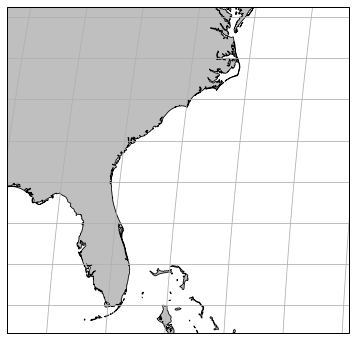

In [175]:
proj = cartopy.crs.Robinson(central_longitude=-40)
pc = cartopy.crs.PlateCarree()

x0 = -86
x1 = -70
y0 = 38
y1 = 24

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.coastlines(linewidth=0.75, color = 'black', resolution = '10m')
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='0.75')
ax.gridlines()
ax.set_extent([x0,x1,y0,y1])
ax.get_extent(crs=None)

x,y = sites_lon, sites_lat

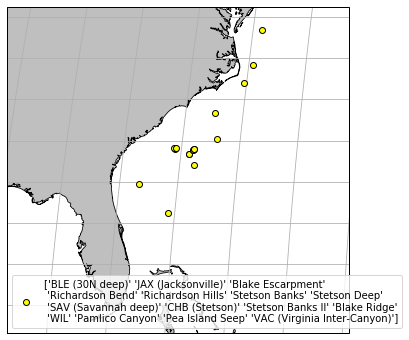

In [218]:
proj = cartopy.crs.Robinson(central_longitude=-40)
pc = cartopy.crs.PlateCarree()

x0 = -86
x1 = -70
y0 = 38
y1 = 24

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection=proj)
ax.coastlines(linewidth=0.75, color = 'black', resolution = '10m')
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='0.75')
ax.gridlines()
ax.set_extent([x0,x1,y0,y1])
ax.get_extent(crs=None)
    
plt.plot(sites_lon, sites_lat,'ro', color = "yellow", markeredgecolor = "black",
         transform=pc, label = names)
plt.legend()

In [219]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np
 
# map = Basemap(projection='merc', lat_0 = 32, lon_0 = -80,
#     resolution = 'l', area_thresh = 0.1,
#     llcrnrlon=x1, llcrnrlat=y1,
#     urcrnrlon=x0, urcrnrlat=y0)
 
# map.drawcoastlines()
# map.drawcountries()
# map.fillcontinents(color = 'coral')
# map.drawmapboundary()
 
# lons = sites_lon
# lats = sites_lat


# x,y = map(lons, lats)
# map.plot(x, y, 'bo', markersize=18)
 
# labels = names
# for label, xpt, ypt in zip(labels, x, y):
#     plt.text(xpt+10000, ypt+5000, label)
 
# plt.show()

In [221]:
names.shape

(15,)